In [1]:
%%time
dataset_name = "W14_comb"
df_list = "BES_reduced_with_na|BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

var_type (5692, 13)
Wall time: 23.1 s


In [7]:
search(BES_Panel,"Trump")

happyTrumpW10    30237
dtype: int64

In [8]:
search(BES_Panel,"wt_new_W10")

wt_new_W10    30237
dtype: int64

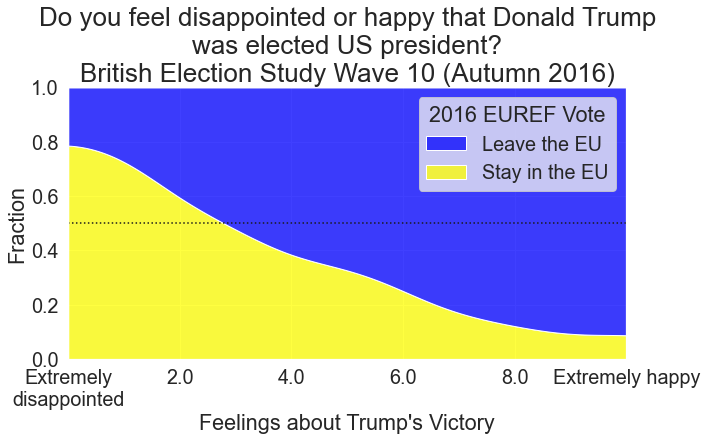

In [4]:
# 16:9
fig_x_size=10
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);
df = BES_Panel[["p_eurefvote","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = df["happyTrumpW10"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["p_eurefvote"]=df["p_eurefvote"].replace({"I voted to leave":"VOTED LEAVE IN 2016",
                                             "I voted to remain":"VOTED REMAIN IN 2016",
                                             "Don't know":np.nan})

df.columns = ["2016 EUREF Vote","Feelings about Trump's Victory","wt"]
sns.kdeplot(data=df,x="Feelings about Trump's Victory",hue="2016 EUREF Vote",weights="wt",cut=0,multiple="fill",
           palette=["blue","yellow"],bw=.5);
import textwrap
x_ticks_labels = [textwrap.fill(x, 19) for x in BES_Panel["happyTrumpW10"].cat.categories[::2]]
plt.xticks(range(0,11,2),x_ticks_labels);
plt.title("Do you feel disappointed or happy that Donald Trump\nwas elected US president?\nBritish Election Study Wave 10 (Autumn 2016)",
         fontsize=26);
plt.hlines(0.5,0.0,10.0,linestyles='dotted');
plt.ylabel("Fraction");

<Figure size 720x360 with 0 Axes>

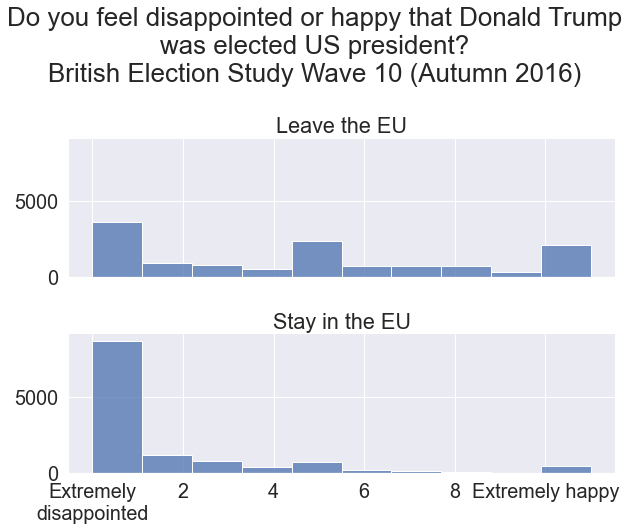

In [5]:
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);

df = BES_Panel[["p_eurefvote","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = df["happyTrumpW10"].cat.codes.replace(-1,np.nan)
df["p_eurefvote"]=df["p_eurefvote"].replace({"I voted to leave":"VOTED LEAVE IN 2016",
                                             "I voted to remain":"VOTED REMAIN IN 2016",
                                             "Don't know":np.nan})
g = sns.FacetGrid(df, col="p_eurefvote",col_wrap=1, height=3, aspect=3);
g.map_dataframe(sns.histplot, x="happyTrumpW10",weights="wt_new_W10");
g.set_titles(col_template="{col_name}");
g.fig.suptitle("Do you feel disappointed or happy that Donald Trump\nwas elected US president?\nBritish Election Study Wave 10 (Autumn 2016)",
               y=1.20);
import textwrap
cats = ['Extremely disappointed', '2', '4', '6', '8', 'Extremely happy']
x_ticks_labels = [textwrap.fill(x, 19) for x in cats]
plt.xticks(range(0,11,2),x_ticks_labels);

In [6]:
df["happyTrumpW10"].value_counts()

0.0     12615
5.0      3492
2.0      2414
1.0      2412
3.0      1811
11.0     1757
10.0     1204
4.0      1076
7.0      1042
6.0      1035
8.0       956
9.0       423
Name: happyTrumpW10, dtype: int64

<Figure size 720x360 with 0 Axes>

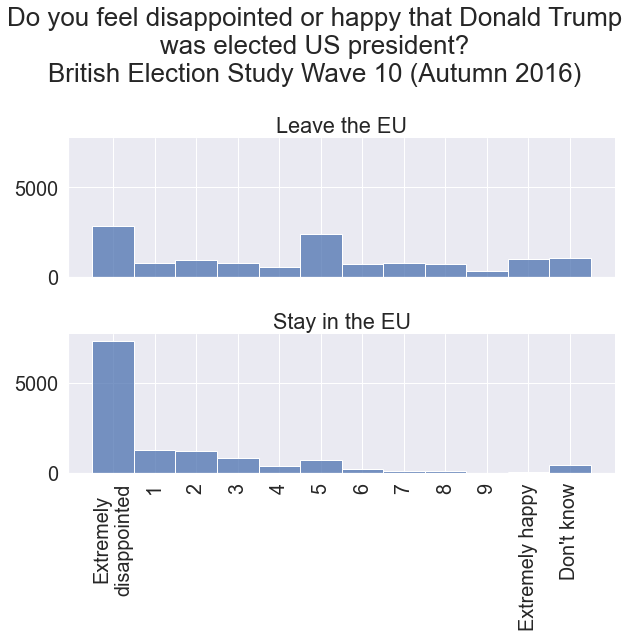

In [44]:
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);

df = BES_Panel[["p_eurefvote","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = df["happyTrumpW10"].cat.codes.replace(-1,np.nan)+.5
df["p_eurefvote"]=df["p_eurefvote"].replace({"I voted to leave":"VOTED LEAVE IN 2016",
                                             "I voted to remain":"VOTED REMAIN IN 2016",
                                             "Don't know":np.nan})
g = sns.FacetGrid(df, col="p_eurefvote",col_wrap=1, height=3, aspect=3);
bins = list([float(x)+.5 for x in range(13)])
g.map_dataframe(sns.histplot, x="happyTrumpW10",weights="wt_new_W10",bins= bins);
g.set_titles(col_template="{col_name}");
g.fig.suptitle("Do you feel disappointed or happy that Donald Trump\nwas elected US president?\nBritish Election Study Wave 10 (Autumn 2016)",
               y=1.20);
import textwrap
cats = ['Extremely disappointed','1', '2', '3', '4', '5', '6', '7', '8', '9', 'Extremely happy', "Don't know"]
x_ticks_labels = [textwrap.fill(x, 19) for x in cats]
plt.xticks(range(1,13,1),x_ticks_labels, rotation=90);

<Figure size 720x360 with 0 Axes>

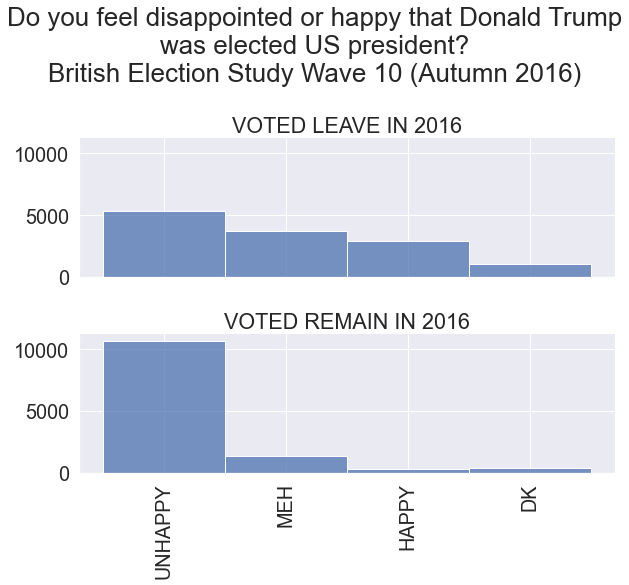

In [52]:
replace_dict = {'Extremely disappointed':"UNHAPPY", '1.0':"UNHAPPY", '2.0':"UNHAPPY", '3.0':"UNHAPPY",
                '4.0':"MEH", '5.0':"MEH", '6.0':"MEH",
                '7.0':"HAPPY", '8.0':"HAPPY", '9.0':"HAPPY", 'Extremely happy':"HAPPY",
                "Don't know":"DK"}

plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);

df = BES_Panel[["p_eurefvote","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = df["happyTrumpW10"].replace(replace_dict)
df["happyTrump"] = df["happyTrumpW10"].replace({"UNHAPPY":0,"MEH":1,"HAPPY":2,"DK":3})+.5
df["p_eurefvote"]=df["p_eurefvote"].replace({"Leave the EU":"VOTED LEAVE IN 2016",
                                             "Stay in the EU":"VOTED REMAIN IN 2016",
                                             "Don't know":np.nan})
g = sns.FacetGrid(df, col="p_eurefvote",col_wrap=1, height=3, aspect=3);
bins = list([float(x)+.5 for x in range(5)])
g.map_dataframe(sns.histplot, x="happyTrump",weights="wt_new_W10",bins= bins,common_norm=True);
g.set_titles(col_template="{col_name}");
g.fig.suptitle("Do you feel disappointed or happy that Donald Trump\nwas elected US president?\nBritish Election Study Wave 10 (Autumn 2016)",
               y=1.20);
import textwrap
cats = ["UNHAPPY","MEH","HAPPY","DK"]
x_ticks_labels = [textwrap.fill(x, 19) for x in cats]
plt.xticks(range(1,5,1),x_ticks_labels, rotation=90);

In [11]:
df["happyTrumpW10"].value_counts()

0.0     12615
5.0      3492
2.0      2414
1.0      2412
3.0      1811
11.0     1757
10.0     1204
4.0      1076
7.0      1042
6.0      1035
8.0       956
9.0       423
Name: happyTrumpW10, dtype: int64

In [16]:
len(cats)

12

In [17]:
len(list(range(1,13,1)))

12

In [45]:
BES_Panel["happyTrumpW10"].cat.categories

Index(['Extremely disappointed', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', 'Extremely happy', 'Don't know'],
      dtype='object')

In [21]:
df["happyTrumpW10"].value_counts()

0.5     12615
5.5      3492
2.5      2414
1.5      2412
3.5      1811
11.5     1757
10.5     1204
4.5      1076
7.5      1042
6.5      1035
8.5       956
9.5       423
Name: happyTrumpW10, dtype: int64

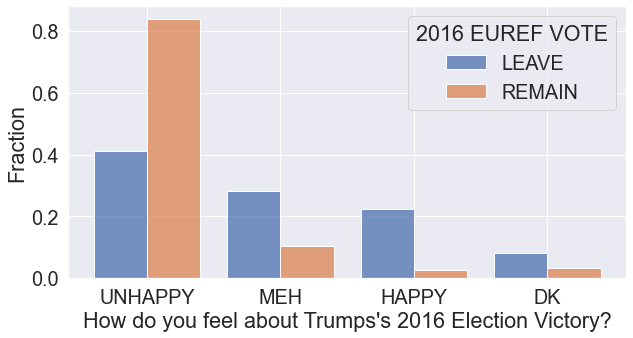

In [75]:
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);

df = BES_Panel[["p_eurefvote","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = df["happyTrumpW10"].replace(replace_dict)
df["happyTrump"] = df["happyTrumpW10"].replace({"UNHAPPY":0,"MEH":1,"HAPPY":2,"DK":3})
df["p_eurefvote"]=df["p_eurefvote"].replace({"Leave the EU":"LEAVE",
                                             "Stay in the EU":"REMAIN",
                                             "Don't know":np.nan})

sns.histplot(data=df.rename(columns = {"p_eurefvote":"2016 EUREF VOTE"}),
                            x="happyTrump", hue="2016 EUREF VOTE", weights="wt_new_W10",
             multiple="dodge", shrink=.8,stat="density", discrete=True,common_norm=False);
plt.ylabel("Fraction");
plt.xlabel("How do you feel about Trumps's 2016 Election Victory?")

import textwrap
cats = ["UNHAPPY","MEH","HAPPY","DK"]
x_ticks_labels = [textwrap.fill(x, 19) for x in cats]
plt.xticks(range(0,4,1),x_ticks_labels, rotation=0);

In [32]:
## Case for adding the DKs to the "MEH"

(0.5, 11.5)

In [7]:
fig_x_size=10
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);

replace_dict = {'Extremely disappointed':"UNHAPPY", '1.0':"UNHAPPY", '2.0':"UNHAPPY", '3.0':"UNHAPPY",
                '4.0':"MEH", '5.0':"MEH", '6.0':"MEH",
                '7.0':"HAPPY", '8.0':"HAPPY", '9.0':"HAPPY", 'Extremely happy':"HAPPY",
                "Don't know":"MEH"}

df = BES_Panel[["p_eurefvote","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = df["happyTrumpW10"].replace(replace_dict)
df["happyTrump"] = df["happyTrumpW10"].replace({"UNHAPPY":0,"MEH":1,"HAPPY":2})
df["p_eurefvote"]=df["p_eurefvote"].replace({"Leave the EU":"LEAVE",
                                             "Stay in the EU":"REMAIN",
                                             "Don't know":np.nan})

sns.histplot(data=df.rename(columns = {"p_eurefvote":"2016 EUREF VOTE"}),
                            x="happyTrump", hue="2016 EUREF VOTE", weights="wt_new_W10",
             multiple="dodge", shrink=.8,stat="density", discrete=True,common_norm=False);
plt.ylabel("Fraction");
plt.xlabel("How do you feel about Trumps's 2016 Election Victory?")

import textwrap
cats = ["UNHAPPY","MEH","HAPPY"]
x_ticks_labels = [textwrap.fill(x, 19) for x in cats]
plt.xticks(range(0,len(cats),1),x_ticks_labels, rotation=0);

KeyError: "['p_eurefvote'] not in index"

<Figure size 720x360 with 0 Axes>

In [16]:
search(BES_reduced_with_na,"happyTrump")

def cats_to_strings(x):
    return x.cat.rename_categories([str(x) for x in x.cat.categories])

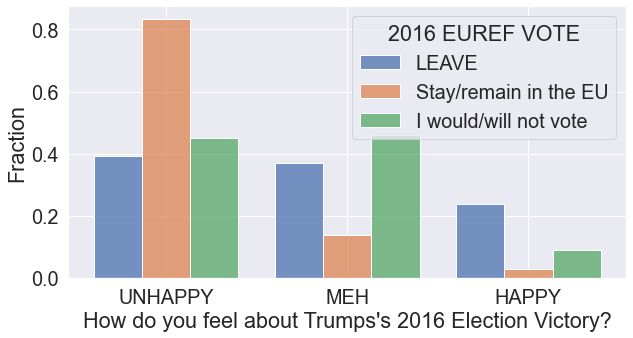

In [17]:
fig_x_size=10
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);

replace_dict = {'Extremely disappointed':"UNHAPPY", '1.0':"UNHAPPY", '2.0':"UNHAPPY", '3.0':"UNHAPPY",
                '4.0':"MEH", '5.0':"MEH", '6.0':"MEH",
                '7.0':"HAPPY", '8.0':"HAPPY", '9.0':"HAPPY", 'Extremely happy':"HAPPY",
                "Don't know":"MEH"}

df = BES_Panel[["euRefVoteW10","happyTrumpW10","wt_new_W10"]]
df["happyTrumpW10"] = cats_to_strings(df["happyTrumpW10"]).replace(replace_dict)
df["happyTrump"] = df["happyTrumpW10"].replace({"UNHAPPY":0,"MEH":1,"HAPPY":2})
df["euRefVoteW10"]=df["euRefVoteW10"].replace({"Leave the EU":"LEAVE",
                                             "Stay in the EU":"REMAIN",
                                             "Don't know":np.nan})

sns.histplot(data=df.rename(columns = {"euRefVoteW10":"2016 EUREF VOTE"}),
                            x="happyTrump", hue="2016 EUREF VOTE", weights="wt_new_W10",
             multiple="dodge", shrink=.8,stat="density", discrete=True,common_norm=False);
plt.ylabel("Fraction");
plt.xlabel("How do you feel about Trumps's 2016 Election Victory?")

import textwrap
cats = ["UNHAPPY","MEH","HAPPY"]
x_ticks_labels = [textwrap.fill(x, 19) for x in cats]
plt.xticks(range(0,len(cats),1),x_ticks_labels, rotation=0);

In [44]:
BES_reduced_with_na["happyTrumpSimple"] = df["happyTrump"].values
BES_reduced_with_na["happyTrumpSimpleMEH"] = (df["happyTrump"]==1).values
BES_reduced_with_na.loc[df["happyTrump"].isnull().values,"happyTrumpSimpleMEH"]=np.nan
BES_reduced_with_na["happyTrumpSimpleHAPPY"] = (df["happyTrump"]==2).values
BES_reduced_with_na.loc[df["happyTrump"].isnull().values,"happyTrumpSimpleHAPPY"]=np.nan
BES_reduced_with_na["happyTrumpSimpleUNHAPPY"] = (df["happyTrump"]==0).values
BES_reduced_with_na.loc[df["happyTrump"].isnull().values,"happyTrumpSimpleUNHAPPY"]=np.nan

In [43]:
BES_reduced_with_na["happyTrumpSimple"]

0        2.0
1        1.0
2        0.0
3        NaN
4        NaN
        ... 
73698    NaN
73699    NaN
73700    NaN
73701    NaN
73702    NaN
Name: happyTrumpSimple, Length: 73703, dtype: float64

In [13]:
BES_Panel["happyTrumpW10"].cat.categories

Index(['Extremely disappointed',                      1.0,
                            2.0,                      3.0,
                            4.0,                      5.0,
                            6.0,                      7.0,
                            8.0,                      9.0,
              'Extremely happy',             'Don't know'],
      dtype='object')

[0]	validation_0-rmse:3.50079
Will train until validation_0-rmse hasn't improved in 50.0 rounds.
[1]	validation_0-rmse:3.39376
[2]	validation_0-rmse:3.29407
[3]	validation_0-rmse:3.20202
[4]	validation_0-rmse:3.11653
[5]	validation_0-rmse:3.03658
[6]	validation_0-rmse:2.96308
[7]	validation_0-rmse:2.89244
[8]	validation_0-rmse:2.83162
[9]	validation_0-rmse:2.77023
[10]	validation_0-rmse:2.71425
[11]	validation_0-rmse:2.66303
[12]	validation_0-rmse:2.61493
[13]	validation_0-rmse:2.56998
[14]	validation_0-rmse:2.52827
[15]	validation_0-rmse:2.48983
[16]	validation_0-rmse:2.45464
[17]	validation_0-rmse:2.42239
[18]	validation_0-rmse:2.39125
[19]	validation_0-rmse:2.36339
[20]	validation_0-rmse:2.33853
[21]	validation_0-rmse:2.31427
[22]	validation_0-rmse:2.29243
[23]	validation_0-rmse:2.2718
[24]	validation_0-rmse:2.25381
[25]	validation_0-rmse:2.23735
[26]	validation_0-rmse:2.22202
[27]	validation_0-rmse:2.20716
[28]	validation_0-rmse:2.19393
[29]	validation_0-rmse:2.18171
[30]	validatio

[259]	validation_0-rmse:1.97647
[260]	validation_0-rmse:1.97635
[261]	validation_0-rmse:1.97649
[262]	validation_0-rmse:1.97654
[263]	validation_0-rmse:1.97663
[264]	validation_0-rmse:1.97674
[265]	validation_0-rmse:1.9766
[266]	validation_0-rmse:1.97669
[267]	validation_0-rmse:1.97685
[268]	validation_0-rmse:1.97678
[269]	validation_0-rmse:1.97679
[270]	validation_0-rmse:1.97676
[271]	validation_0-rmse:1.9766
[272]	validation_0-rmse:1.97657
[273]	validation_0-rmse:1.97669
[274]	validation_0-rmse:1.9768
[275]	validation_0-rmse:1.97686
[276]	validation_0-rmse:1.9768
[277]	validation_0-rmse:1.97699
[278]	validation_0-rmse:1.97687
[279]	validation_0-rmse:1.97671
[280]	validation_0-rmse:1.97671
[281]	validation_0-rmse:1.97669
[282]	validation_0-rmse:1.97659
[283]	validation_0-rmse:1.9766
[284]	validation_0-rmse:1.97667
[285]	validation_0-rmse:1.97674
[286]	validation_0-rmse:1.97665
[287]	validation_0-rmse:1.97664
[288]	validation_0-rmse:1.97654
[289]	validation_0-rmse:1.97651
[290]	validat

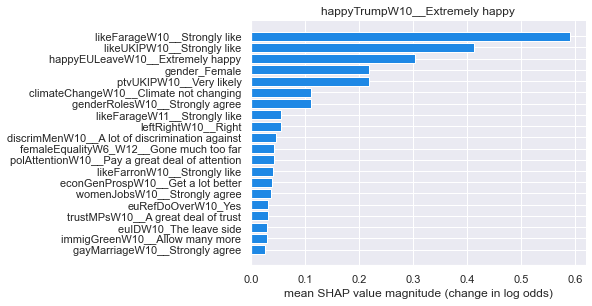

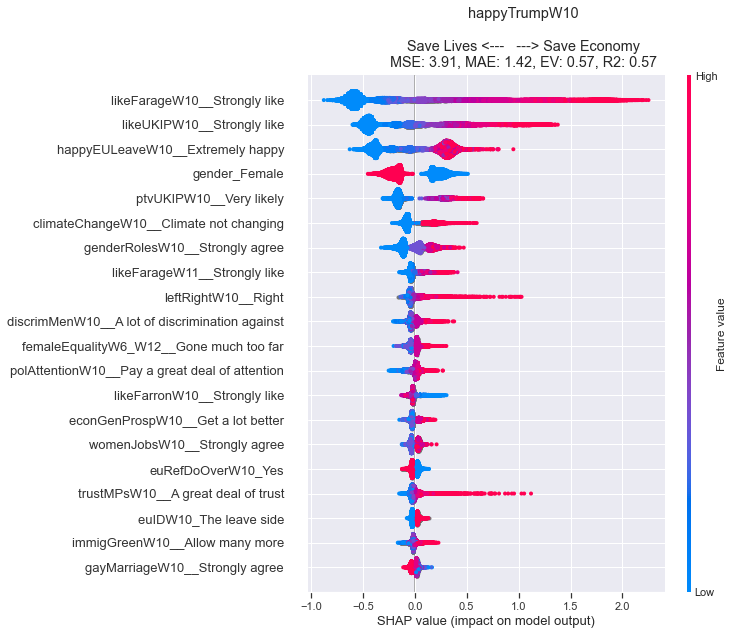

Wall time: 11min 40s


In [10]:
%%time
Treatment = "happyTrumpW10__Extremely happy"
var_stub = "happyTrump"

var_list = ["happyTrumpW10__Extremely happy"]
var_stub_list = [var_stub,"happyTrumpW10__Extremely happy"]


colname = "happyTrumpW10"


(explainer, shap_values, train_columns, train_index, alg, output_subfolder) =  xgboost_run(
            subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nSave Lives <---   ---> Save Economy")

[0]	validation_0-rmse:3.50913
Will train until validation_0-rmse hasn't improved in 50.0 rounds.
[1]	validation_0-rmse:3.41257
[2]	validation_0-rmse:3.3199
[3]	validation_0-rmse:3.23432
[4]	validation_0-rmse:3.15248
[5]	validation_0-rmse:3.07629
[6]	validation_0-rmse:3.00687
[7]	validation_0-rmse:2.94201
[8]	validation_0-rmse:2.88122
[9]	validation_0-rmse:2.82335
[10]	validation_0-rmse:2.76886
[11]	validation_0-rmse:2.72071
[12]	validation_0-rmse:2.6744
[13]	validation_0-rmse:2.63197
[14]	validation_0-rmse:2.59287
[15]	validation_0-rmse:2.55853
[16]	validation_0-rmse:2.52519
[17]	validation_0-rmse:2.49378
[18]	validation_0-rmse:2.46542
[19]	validation_0-rmse:2.43885
[20]	validation_0-rmse:2.41532
[21]	validation_0-rmse:2.39288
[22]	validation_0-rmse:2.37039
[23]	validation_0-rmse:2.3509
[24]	validation_0-rmse:2.33277
[25]	validation_0-rmse:2.31555
[26]	validation_0-rmse:2.29913
[27]	validation_0-rmse:2.28341
[28]	validation_0-rmse:2.26966
[29]	validation_0-rmse:2.25696
[30]	validation_

[259]	validation_0-rmse:2.03992
[260]	validation_0-rmse:2.03994
[261]	validation_0-rmse:2.03978
[262]	validation_0-rmse:2.03976
[263]	validation_0-rmse:2.03953
[264]	validation_0-rmse:2.03933
[265]	validation_0-rmse:2.03911
[266]	validation_0-rmse:2.03913
[267]	validation_0-rmse:2.03897
[268]	validation_0-rmse:2.03871
[269]	validation_0-rmse:2.03872
[270]	validation_0-rmse:2.03901
[271]	validation_0-rmse:2.03873
[272]	validation_0-rmse:2.0387
[273]	validation_0-rmse:2.03865
[274]	validation_0-rmse:2.03849
[275]	validation_0-rmse:2.03835
[276]	validation_0-rmse:2.0381
[277]	validation_0-rmse:2.03796
[278]	validation_0-rmse:2.03806
[279]	validation_0-rmse:2.03811
[280]	validation_0-rmse:2.03793
[281]	validation_0-rmse:2.03784
[282]	validation_0-rmse:2.03803
[283]	validation_0-rmse:2.03795
[284]	validation_0-rmse:2.03798
[285]	validation_0-rmse:2.03784
[286]	validation_0-rmse:2.03783
[287]	validation_0-rmse:2.03781
[288]	validation_0-rmse:2.03793
[289]	validation_0-rmse:2.03781
[290]	vali

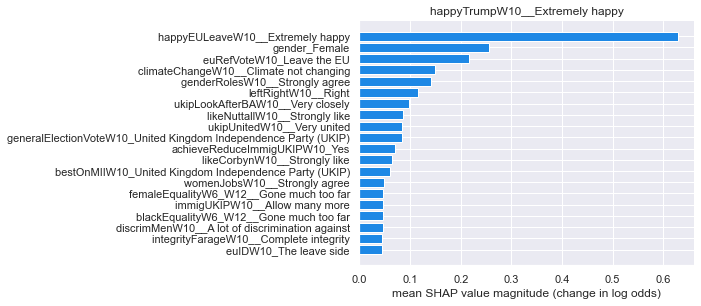

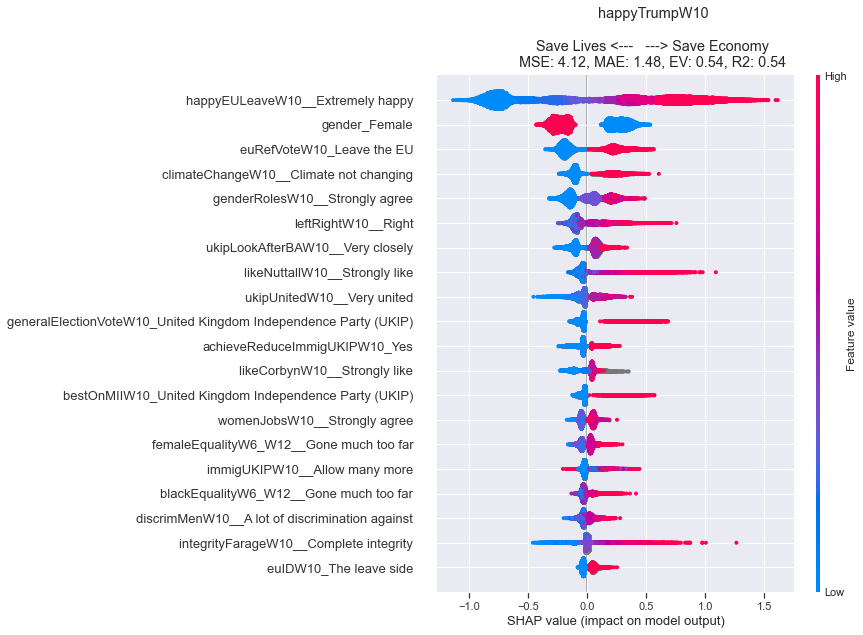

Wall time: 18min 29s


In [2]:
%%time
Treatment = "happyTrumpW10__Extremely happy"
var_stub = "happyTrump"

var_list = ["happyTrumpW10__Extremely happy"]
var_stub_list = [var_stub,"happyTrumpW10__Extremely happy","likeFarage","likeUKIP","ptvUKIP","likeFarron"]


colname = "happyTrumpW10"


(explainer, shap_values, train_columns, train_index, alg, output_subfolder) =  xgboost_run(
            subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nSave Lives <---   ---> Save Economy")

In [29]:
##  ukipLookAfterBA
## ukipUnited
## generalElectionVoteW10_United Kingdom Independence Party (UKIP)
## likeNuttall

BES_Panel["ageW1"]

id
1.0        58.0
2.0        62.0
3.0        76.0
4.0        51.0
5.0        68.0
           ... 
75180.0     NaN
75181.0     NaN
75182.0     NaN
75183.0     NaN
75184.0     NaN
Name: ageW1, Length: 73703, dtype: category
Categories (79, float64): [4.0 < 15.0 < 16.0 < 17.0 ... 91.0 < 93.0 < 95.0 < 105.0]

In [30]:
BES_reduced_with_na["ageW1"]

0        58.0
1        62.0
2        76.0
3        51.0
4        68.0
         ... 
73698     NaN
73699     NaN
73700     NaN
73701     NaN
73702     NaN
Name: ageW1, Length: 73703, dtype: float32

[0]	validation_0-rmse:3.51018
Will train until validation_0-rmse hasn't improved in 36.5 rounds.
[1]	validation_0-rmse:3.41538
[2]	validation_0-rmse:3.32506
[3]	validation_0-rmse:3.24037
[4]	validation_0-rmse:3.1611
[5]	validation_0-rmse:3.08737
[6]	validation_0-rmse:3.01788
[7]	validation_0-rmse:2.95356
[8]	validation_0-rmse:2.89484
[9]	validation_0-rmse:2.84111
[10]	validation_0-rmse:2.7889
[11]	validation_0-rmse:2.74261
[12]	validation_0-rmse:2.69629
[13]	validation_0-rmse:2.65433
[14]	validation_0-rmse:2.61605
[15]	validation_0-rmse:2.58092
[16]	validation_0-rmse:2.54901
[17]	validation_0-rmse:2.51801
[18]	validation_0-rmse:2.48915
[19]	validation_0-rmse:2.46229
[20]	validation_0-rmse:2.43823
[21]	validation_0-rmse:2.41512
[22]	validation_0-rmse:2.39319
[23]	validation_0-rmse:2.37431
[24]	validation_0-rmse:2.35708
[25]	validation_0-rmse:2.34008
[26]	validation_0-rmse:2.32475
[27]	validation_0-rmse:2.31046
[28]	validation_0-rmse:2.29735
[29]	validation_0-rmse:2.28513
[30]	validation

[259]	validation_0-rmse:2.06845
[260]	validation_0-rmse:2.06824
[261]	validation_0-rmse:2.06822
[262]	validation_0-rmse:2.06817
[263]	validation_0-rmse:2.06814
[264]	validation_0-rmse:2.06798
[265]	validation_0-rmse:2.06754
[266]	validation_0-rmse:2.06743
[267]	validation_0-rmse:2.06718
[268]	validation_0-rmse:2.06718
[269]	validation_0-rmse:2.06718
[270]	validation_0-rmse:2.06702
[271]	validation_0-rmse:2.067
[272]	validation_0-rmse:2.06716
[273]	validation_0-rmse:2.06706
[274]	validation_0-rmse:2.06722
[275]	validation_0-rmse:2.06702
[276]	validation_0-rmse:2.06694
[277]	validation_0-rmse:2.06705
[278]	validation_0-rmse:2.06683
[279]	validation_0-rmse:2.06699
[280]	validation_0-rmse:2.06692
[281]	validation_0-rmse:2.06696
[282]	validation_0-rmse:2.06686
[283]	validation_0-rmse:2.06673
[284]	validation_0-rmse:2.0668
[285]	validation_0-rmse:2.06695
[286]	validation_0-rmse:2.06703
[287]	validation_0-rmse:2.06704
[288]	validation_0-rmse:2.06698
[289]	validation_0-rmse:2.06677
[290]	valid

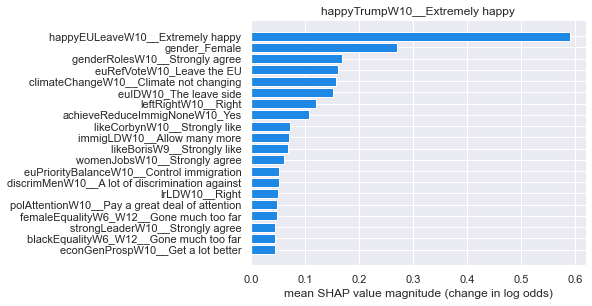

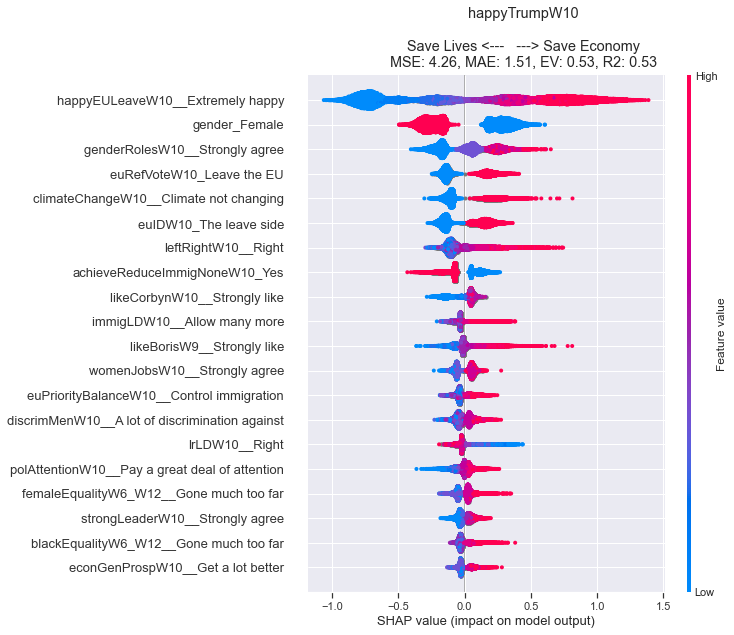

Wall time: 13min 35s


In [5]:
%%time
Treatment = "happyTrumpW10__Extremely happy"
var_stub = "happyTrump"

var_list = ["happyTrumpW10__Extremely happy"]
var_stub_list = [var_stub,"happyTrumpW10__Extremely happy","likeNuttall","likeFarage","ukip","UKIP","likeFarron",
                 "generalElectionVoteW10_United Kingdom Independence Party (UKIP)","integrityFarage","competentFarage",
                 "likeSEvans",]


colname = "happyTrumpW10"


(explainer, shap_values, train_columns, train_index, alg, output_subfolder) =  xgboost_run(
            subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nSave Lives <---   ---> Save Economy")

In [45]:
%%time
sns.set(font_scale=1.0);
Treatment = "happyTrumpSimpleMEH"
var_stub = "happyTrump"

var_list = ["happyTrumpSimpleMEH"]
var_stub_list = [var_stub,"likeNuttall","likeFarage","ukip","UKIP","likeFarron",
                 "generalElectionVoteW10_United Kingdom Independence Party (UKIP)","integrityFarage","competentFarage",
                 "likeSEvans",]


colname = "happyTrumpSimpleMEH"


(explainer, shap_values, train_columns, train_index, alg, output_subfolder) =  xgboost_run(
            subdir=colname,dataset=BES_reduced_with_na[BES_reduced_with_na["happyTrumpSimple"].notnull()],
            var_list=var_list,var_stub_list=var_stub_list,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = colname+"\n\nUnhappy Trump Pres <---   ---> Happy Trump Pres")

[0]	validation_0-rmse:0.490876
Will train until validation_0-rmse hasn't improved in 0.1 rounds.
MSE: 0.24, MAE: 0.49, EV: 0.02, R2: -0.33


ValueError: zero-size array to reduction operation maximum which has no identity

In [24]:
BES_reduced_with_na["happyTrumpSimple"].value_counts(dropna=False)

NaN    43466
0.0    19252
1.0     7360
2.0     3625
Name: happyTrumpSimple, dtype: int64

In [42]:
BES_reduced_with_na["happyTrumpSimpleMEH"].value_counts(dropna=False)

NaN    43466
0.0    30237
Name: happyTrumpSimpleMEH, dtype: int64

In [31]:


BES_reduced_with_na["happyTrumpW10__Extremely happy"]

0        8.0
1        NaN
2        0.0
3        NaN
4        NaN
        ... 
73698    NaN
73699    NaN
73700    NaN
73701    NaN
73702    NaN
Name: happyTrumpW10__Extremely happy, Length: 73703, dtype: float32

In [32]:
BES_reduced_with_na["happyTrumpSimple"]

0        NaN
1        2.0
2        1.0
3        0.0
4        NaN
        ... 
73698    NaN
73699    NaN
73700    NaN
73701    NaN
73702    NaN
Name: happyTrumpSimple, Length: 73703, dtype: float64

In [34]:
BES_Panel["happyTrumpW10"]

id
1.0                             8
2.0                    Don't know
3.0        Extremely disappointed
4.0                           NaN
5.0                           NaN
                    ...          
75180.0                       NaN
75181.0                       NaN
75182.0                       NaN
75183.0                       NaN
75184.0                       NaN
Name: happyTrumpW10, Length: 73703, dtype: category
Categories (12, object): [Extremely disappointed < 1 < 2 < 3 ... 8 < 9 < Extremely happy < Don't know]

In [36]:
df["happyTrump"]

id
1.0        2.0
2.0        1.0
3.0        0.0
4.0        NaN
5.0        NaN
          ... 
75180.0    NaN
75181.0    NaN
75182.0    NaN
75183.0    NaN
75184.0    NaN
Name: happyTrump, Length: 73703, dtype: float64